In [161]:
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import ast

In [162]:
df  = pd.read_csv('DataBase.csv')
df.head()

,device,kernel
0,"{'time': 49.463, 's2': {'ax': -0.08379706, 'ay...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."
1,"{'time': 49.523, 's2': {'ax': -0.1651999, 'ay'...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."
2,"{'time': 49.523, 's2': {'ax': -0.1651999, 'ay'...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."
3,"{'time': 49.543, 's2': {'ax': -0.07900865, 'ay...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."
4,"{'time': 49.563, 's2': {'ax': -0.04309563, 'ay...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."


# TRATAMENTO DE DADOS

In [163]:
df = df.head(20000).copy()

In [164]:
device = df.device.apply(ast.literal_eval).apply(pd.Series)
device

,time,s2,s1
0,49.463,"{'ax': -0.08379706, 'ay': 0.6105214, 'wz': -0....","{'ax': -0.09816227, 'ay': 0.581791, 'wz': -0.0..."
1,49.523,"{'ax': -0.1651999, 'ay': 0.581791, 'wz': -0.01...","{'ax': -0.09816227, 'ay': 0.5722142, 'wz': -0...."
2,49.523,"{'ax': -0.1651999, 'ay': 0.581791, 'wz': -0.01...","{'ax': -0.09816227, 'ay': 0.5722142, 'wz': -0...."
3,49.543,"{'ax': -0.07900865, 'ay': 0.6847417, 'wz': -0....","{'ax': -0.05506664, 'ay': 1.223437, 'wz': -0.0..."
4,49.563,"{'ax': -0.04309563, 'ay': 0.5865794, 'wz': -0....","{'ax': -0.07900865, 'ay': 0.5770026, 'wz': -0...."
...,...,...,...
3761,96.693,"{'ax': -0.06464344, 'ay': -0.3878607, 'wz': -0...","{'ax': -0.002394202, 'ay': -0.3902549, 'wz': -..."
3762,96.693,"{'ax': -0.06464344, 'ay': -0.3878607, 'wz': -0...","{'ax': -0.002394202, 'ay': -0.3902549, 'wz': -..."
3763,96.713,"{'ax': -0.004788403, 'ay': -0.002394202, 'wz':...","{'ax': -0.02873042, 'ay': -0.3280056, 'wz': -0..."
3764,96.733,"{'ax': -0.02394202, 'ay': -0.4668693, 'wz': -0...","{'ax': -0.05027823, 'ay': -0.4668693, 'wz': -0..."


In [165]:
kernel = df.kernel.apply(ast.literal_eval).apply(pd.Series)
kernel

,pitch,roll,yaw,wx,wy,wz,ax,ay,az
0,0.00,0.00,0.00,1.0,2.0,-3.0,-100.0,-54.0,484.0
1,0.00,0.00,0.00,1.0,2.0,-3.0,-100.0,-54.0,484.0
2,0.00,0.00,0.00,1.0,2.0,-3.0,-100.0,-54.0,484.0
3,0.00,0.00,0.00,1.0,2.0,-3.0,-100.0,-54.0,484.0
4,0.00,0.00,0.00,1.0,2.0,-3.0,-100.0,-54.0,484.0
...,...,...,...,...,...,...,...,...,...
3761,-0.16,6.28,348.97,-2.0,-8.0,-2.0,-54.0,1.0,496.0
3762,-0.16,6.28,348.97,-2.0,-8.0,-2.0,-54.0,1.0,496.0
3763,-0.16,6.28,348.97,-2.0,-8.0,-2.0,-54.0,1.0,496.0
3764,-0.16,6.28,348.97,-4.0,5.0,0.0,-50.0,5.0,499.0


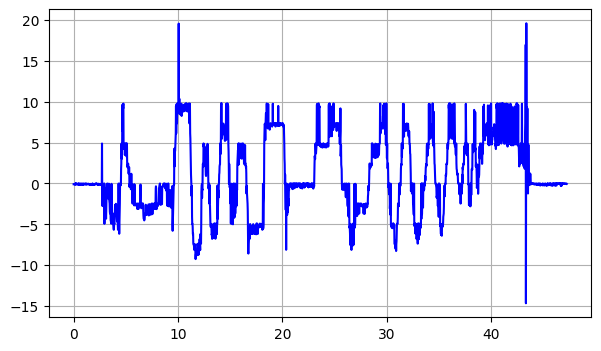

In [166]:
device['time'] = device.time - device.time.values[0]

plt.figure(figsize=(7, 4))
plt.plot(device.time, [s['ax'] for s in device['s1']], color='blue')
plt.grid()

In [167]:
print(float(np.round(device.time.diff().median(), 3)))
dt = 0.020

0.02


# LIMITES

In [168]:
SAMPLE_RANGE = (10, 40)
kernel['time'] = device.time

device = device.copy().loc[(device.time > SAMPLE_RANGE[0]) & (device.time < SAMPLE_RANGE[1])]
kernel = kernel.copy().loc[(kernel.time > SAMPLE_RANGE[0]) & (kernel.time < SAMPLE_RANGE[1])]

device['time'] = device.time - device.time.values[0]
kernel['time'] = kernel.time - kernel.time.values[0]

In [169]:
device.head()

,time,s2,s1
790,0.00,"{'ax': 8.880095, 'ay': -4.611232, 'wz': -0.112...","{'ax': 8.880095, 'ay': -4.611232, 'wz': -0.103..."
791,0.00,"{'ax': 8.880095, 'ay': -4.611232, 'wz': -0.112...","{'ax': 8.880095, 'ay': -4.611232, 'wz': -0.103..."
792,0.02,"{'ax': 9.452309, 'ay': -4.754885, 'wz': -0.072...","{'ax': 9.495404, 'ay': -4.752491, 'wz': -0.103..."
793,0.04,"{'ax': 9.746795, 'ay': -4.311957, 'wz': 0.0638...","{'ax': 9.703699, 'ay': -4.302381, 'wz': 0.0510..."
794,0.04,"{'ax': 9.746795, 'ay': -4.311957, 'wz': 0.0638...","{'ax': 9.703699, 'ay': -4.302381, 'wz': 0.0510..."


In [170]:
kernel.head()

,pitch,roll,yaw,wx,wy,wz,ax,ay,az,time
790,26.60,-49.98,307.93,722.0,-2628.0,-106.0,221.0,174.0,265.0,0.00
791,27.80,-55.47,306.93,716.0,-2374.0,-239.0,301.0,160.0,237.0,0.00
792,28.77,-60.41,305.73,704.0,-2019.0,-36.0,299.0,224.0,184.0,0.02
793,29.37,-64.83,304.39,558.0,-1732.0,74.0,340.0,213.0,115.0,0.04
794,29.37,-64.83,304.39,558.0,-1732.0,74.0,340.0,213.0,115.0,0.04


# ANÁLISE

In [171]:
sensor = 's1'
key    = 'ax'

kernelData = np.array(kernel[key])
sensorData = np.array([s[key] for s in device[sensor]])

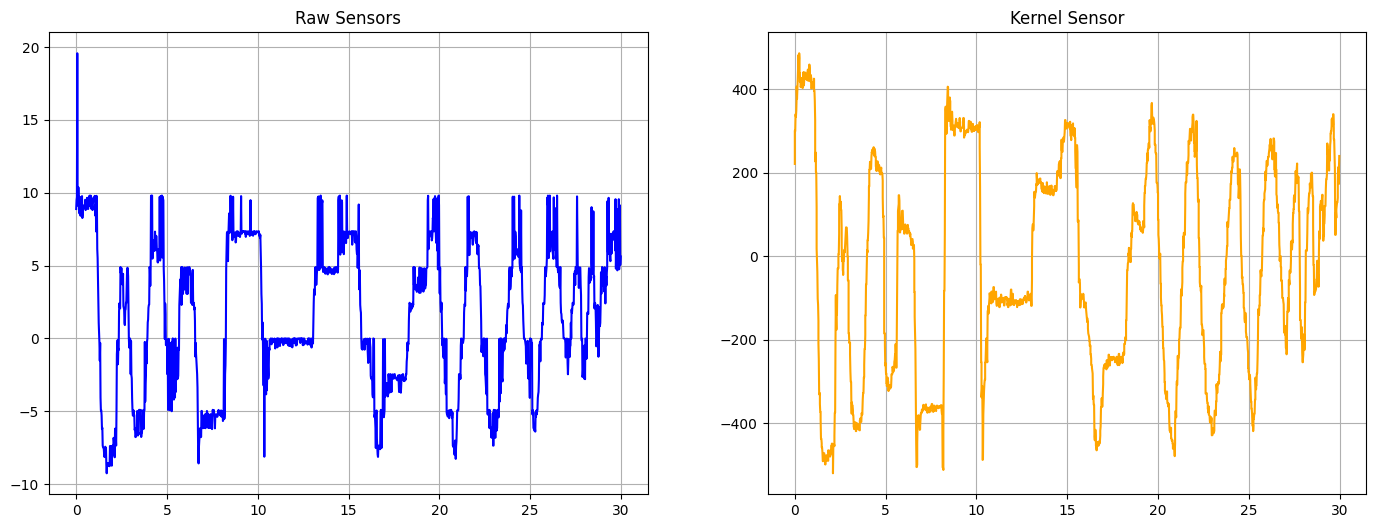

In [172]:
plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
plt.plot(device.time, sensorData, color='blue')
plt.title('Raw Sensors')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(kernel.time, kernelData, color='orange')
plt.title('Kernel Sensor')
plt.grid()

- Comparação normalizada com erro relacionado à distancia entre os pontos

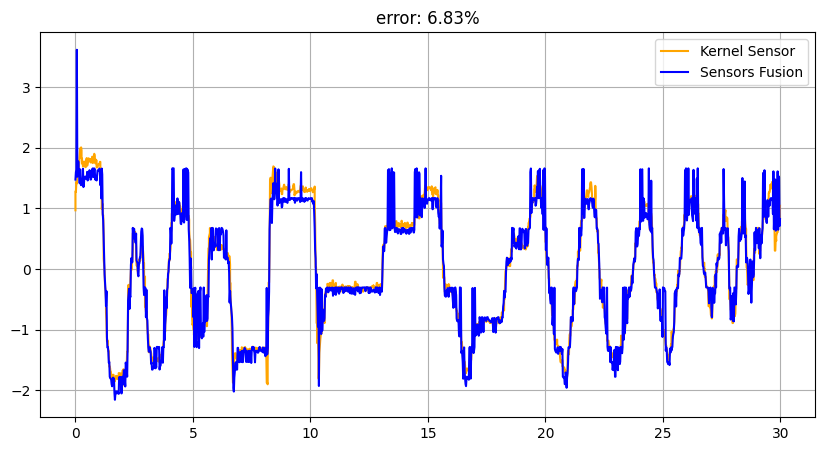

In [173]:
def normalize(data):
    return np.array(data - np.mean(data))/np.std(data)

def compare(data1, data2):
    data1 = normalize(data1)
    data2 = normalize(data2)
    score = wasserstein_distance(data1, data2)
    return data1, data2, score


k, s, score = compare(kernelData, sensorData)
plt.figure(figsize=(10, 5))
plt.plot(kernel.time, k, color='orange', label='Kernel Sensor')
plt.plot(device.time, s, color='blue',  label='Sensors Fusion')
plt.title(f'error: {score*100:.2f}%')
plt.legend(), plt.grid()
plt.show()

# FILTRO PRONTO

In [174]:
import control as ctl

Xn*(0.003725) + self.Xn1*(0.007449) + self.Xn2*(0.003725) + self.Yn1*(1.803961) + self.Yn2*(-0.818859)


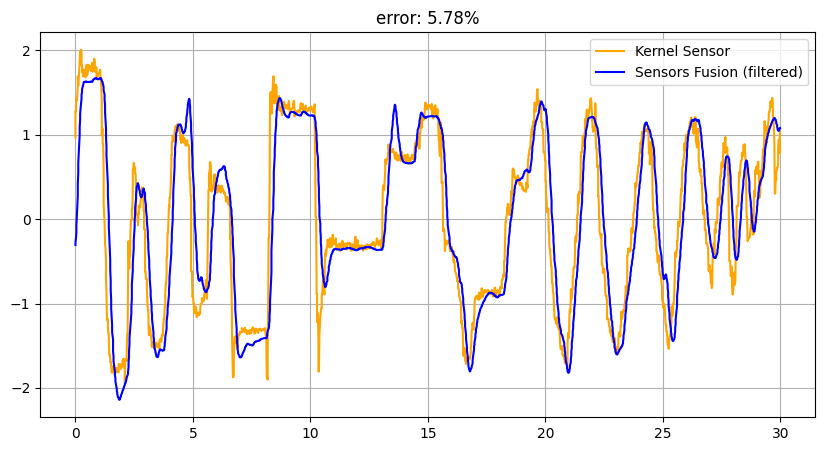

In [175]:
class LaplaceFilter:
    num = []
    den = []
    
    def __init__(self, Ts=1.0, UP=0.1, dt=0.05, Tp=None):
        zeta = -np.log(UP)/np.sqrt(np.pi**2 + np.log(UP)**2)
        Wn   = 4/(zeta*Ts)

        if Tp is not None:
            Wn = np.pi/(Tp*np.sqrt(1 - zeta**2))

        s = ctl.TransferFunction.s
        C = Wn**2/(s**2 + 2*zeta*Wn*s + Wn**2)

        C_z = ctl.c2d(C, dt, method='tustin')
        self.num, self.den = self.getFraction(C_z)
        self.Xn = np.zeros_like(self.num)
        self.Yn = np.zeros_like(self.den)
        self.dt = dt

    def getFraction(self, G_z):
        num, den = ctl.tfdata(G_z)
        num = np.squeeze(num)
        den = np.squeeze(den)

        num = num/den[0]
        den = den/den[0]

        if type(num) == np.float64:
            num = np.array([num])

        num = [float(val) for val in num]
        den = [float(val) for val in den]
        return (num, den) 

    def compute(self):
        out = 0.0

        for i in range(0, len(self.num)):
            out += self.Xn[i]*(self.num[i])
        
        for i in range(1, len(self.den)):
            out += self.Yn[i]*(-1*self.den[i])

        return out

    def update(self, input):
        for n in range(len(self.num)-1, 0, -1):
            self.Xn[n] = self.Xn[n-1]

        for n in range(len(self.den)-1, 0, -1):
            self.Yn[n] = self.Yn[n-1]
        
        self.Xn[0] = input
        self.Yn[0] = self.compute()
        return self.Yn[0]
    
    def getout(self):
        out = ''
        
        for i in range(0, len(self.num)): 
            out += f'self.Xn{i}*({self.num[i]:.6f}) + '

        for i in range(1, len(self.den)): 
            out += f'self.Yn{i}*({-1*self.den[i]:.6f}) + '
        
        out = out.replace('Xn0', 'Xn')[:-3].replace('self.Xn*', 'Xn*')
        print(out)
        return out


filter = LaplaceFilter(Ts=0.8, UP=0.02, dt=dt)
out = filter.getout()

yModel = np.array([filter.update(val) for val in sensorData])
k, s, score = compare(kernelData, yModel)

plt.figure(figsize=(10, 5))
plt.plot(kernel.time, k, color='orange', label='Kernel Sensor')
plt.plot(device.time, s, color='blue',  label='Sensors Fusion (filtered)')
plt.title(f'error: {score*100:.2f}%')
plt.legend(), plt.grid()
plt.show()

# FILTRO EMBARCADO

In [176]:
import time
millis = lambda: int(time.time() * 1000)

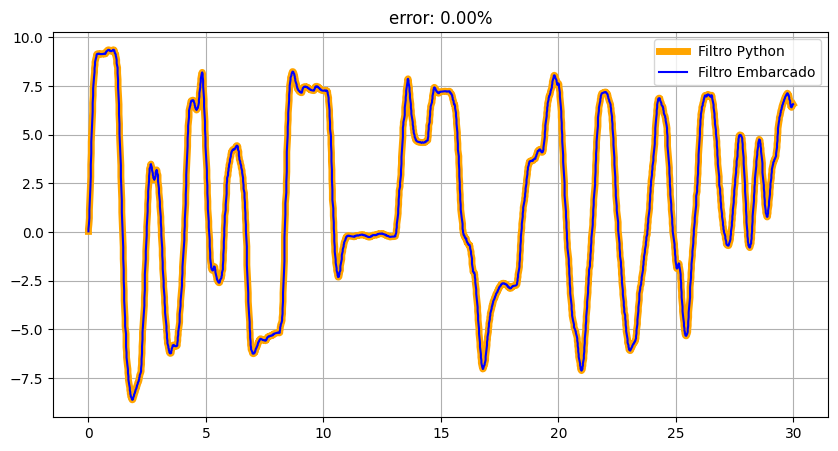

In [177]:
class LaplaceFilter:
    def __init__(self):
        self.Xn1 = self.Xn2 = 0
        self.Yn1 = self.Yn2 = 0
        self.startTime = millis()

    def compute(self, Xn): # garantir tempo de amostragem dt
        Yn = eval(out)
        self.Xn2, self.Xn1 = self.Xn1, Xn
        self.Yn2, self.Yn1 = self.Yn1, Yn
        return Yn


filter    = LaplaceFilter()
yEmbedded = [filter.compute(val) for val in sensorData]
k, s, score = compare(yEmbedded, yModel)

plt.figure(figsize=(10, 5))
plt.plot(device.time, yModel, color='orange', label='Filtro Python', linewidth=5)
plt.plot(device.time, yEmbedded, color='blue',  label='Filtro Embarcado')
plt.title(f'error: {score*100:.2f}%')
plt.legend(), plt.grid()
plt.show()

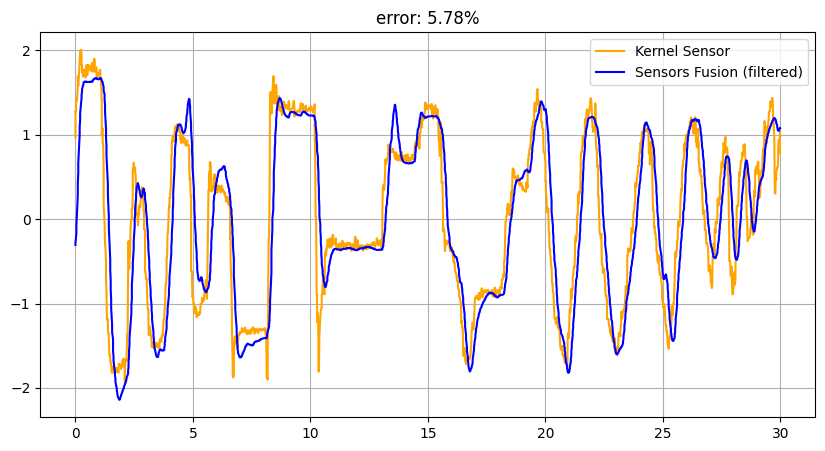

In [178]:
k, s, score = compare(kernelData, yEmbedded)
plt.figure(figsize=(10, 5))
plt.plot(kernel.time, k, color='orange', label='Kernel Sensor')
plt.plot(device.time, s, color='blue',  label='Sensors Fusion (filtered)')
plt.title(f'error: {score*100:.2f}%')
plt.legend(), plt.grid()
plt.show()